# EDA Example
EDA，即探索性数据分析（exploratory data analysis），是机器学习项目的必要环节。
本Notebook展示了如何利用Pandas进行基本的数据分析
## 1.环境初始化

In [1]:
# 前两行画图
%matplotlib inline
import matplotlib.pyplot as plt

# 数据处理
import numpy as np
import pandas as pd

# 系统库
import os, sys

# 自带数据
datalib_path = os.path.join(os.path.abspath('.'), '../')
sys.path.append(datalib_path)
import dataset

## 2. 利用Pandas载入数据

In [4]:
train = pd.read_csv(os.path.join(dataset.titanic_path, 'train.csv'))
test = pd.read_csv(os.path.join(dataset.titanic_path, 'test.csv'))

## 3. 利用Pandas分析基本数据情况

In [5]:
# 观察数据基本情况
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# 观察数据类型
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# 观察数据的规模
print('行数，列数')
print('training set', train.shape)
print('testing set', test.shape)

行数，列数
training set (891, 12)
testing set (418, 11)


In [11]:
# 观察columns
print(train.columns)
print(test.columns)

# 查找是否train和test不一致
for col in train.columns:
    if col not in test.columns:
        print('Column', col, 'not exist in test')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Column Survived not exist in test


In [12]:
# 每列有几种不同的值
train.nunique()  

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## 4. 利用Pandas工具函数探索数据的值

In [13]:
# 指定column的基本情况
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [17]:
# 离散值分布
train['Sex'].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [18]:
# 连续值 统计信息
print(test.Fare.mean())
print(test.Fare.max())
print(test.Fare.std())

35.6271884892086
512.3292
55.90757617997383


In [21]:
# NaN 统计
for key in test.columns:
    print(key, test[key].isnull().astype(int).sum(), train.shape[0])

PassengerId 0 891
Pclass 0 891
Name 0 891
Sex 0 891
Age 86 891
SibSp 0 891
Parch 0 891
Ticket 0 891
Fare 1 891
Cabin 327 891
Embarked 0 891


In [22]:
# 唯一值
print(train.Fare.nunique()) # 速度快
print(len(train.Fare.unique()))

fare_unique = test.Fare.unique()
fare_unique_sorted = np.sort(fare_unique)
print(fare_unique_sorted)

248
248
[  0.       3.1708   6.4375   6.4958   6.95     7.       7.05     7.225
   7.2292   7.25     7.2833   7.55     7.575    7.5792   7.6292   7.65
   7.7208   7.725    7.7333   7.75     7.775    7.7792   7.7958   7.8208
   7.8292   7.85     7.8542   7.8792   7.8875   7.8958   7.925    8.05
   8.1125   8.5167   8.6625   8.7125   8.9625   9.225    9.325    9.35
   9.5      9.6875  10.5     10.7083  11.5     12.1833  12.2875  12.35
  12.7375  12.875   13.      13.4167  13.5     13.775   13.8583  13.8625
  13.9     14.1083  14.4     14.4542  14.4583  14.5     15.0333  15.0458
  15.1     15.2458  15.5     15.55    15.5792  15.7417  15.75    15.9
  16.      16.1     16.7     17.4     18.      20.2125  20.25    20.575
  21.      21.075   21.6792  22.025   22.3583  22.525   23.      23.25
  23.45    24.15    25.4667  25.7     25.7417  26.      26.55    27.4458
  27.7208  27.75    28.5     28.5375  29.      29.125   29.7     30.
  30.5     31.3875  31.5     31.6792  31.6833  32.5     34.375

In [23]:
# 分组统计
test.groupby('SibSp').Fare.nunique()

SibSp
0    118
1     74
2     12
3      4
4      3
5      1
8      1
Name: Fare, dtype: int64

In [21]:
# 去重复值
columns = ['Survived', 'Pclass', 'Fare']
print(train[columns].shape)
print(train[columns].drop_duplicates().shape)

(891, 3)
(336, 3)


## 4.基本可视化

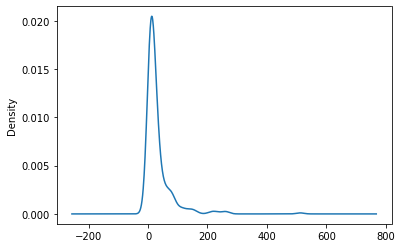

In [26]:
# 直接利用pandas
# 概率分布
train.Fare.plot(kind='kde')

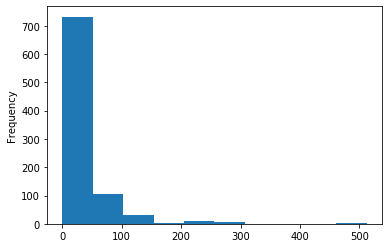

In [27]:
# 直方图
train.Fare.plot(kind='hist')

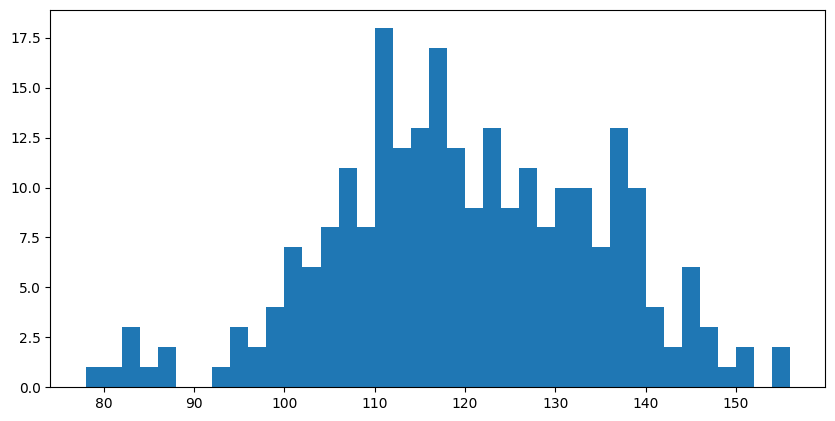

In [28]:
# 利用matplotlib画直方图
time = [131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114, 119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125, 138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]

plt.figure(figsize=(10, 5), dpi=100)  # 创建画布
group_num = int((max(time) - min(time)) / 2)  # 多少根柱子
plt.hist(time, bins=group_num)  # 绘制直方图
plt.show()

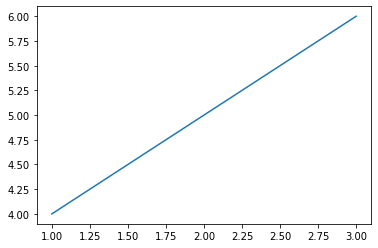

In [29]:
# 折线图
plt.plot([1,2,3],[4,5,6])

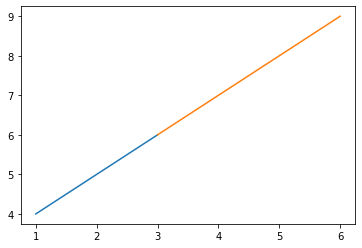

In [32]:
# 多重折线图
plt.plot([1,2,3],[4,5,6])
plt.plot([3,5,6],[6,8,9])

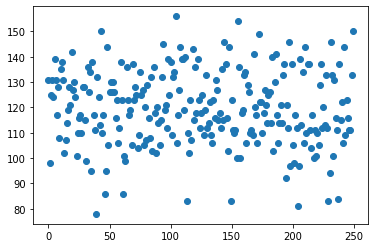

In [34]:
# 点图
plt.scatter(list(range(len(time))), time)

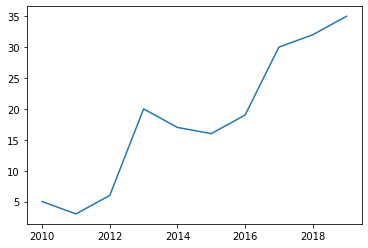

In [36]:
# 折线图 Plot
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]  # 数据准备
y = [5, 3, 6, 20, 17, 16, 19, 30, 32, 35]
plt.plot(x, y)  # 使用Matplotlib画折线图
plt.show()

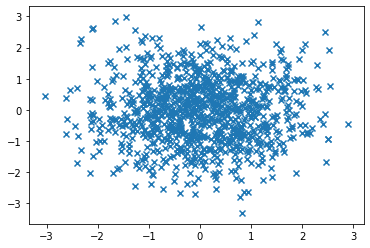

In [37]:
#### 散点图 Scatter
x = np.random.randn(1000)  # 数据准备
y = np.random.randn(1000)
plt.scatter(x, y, marker='x')  # 用Matplotlib画散点图
plt.show()

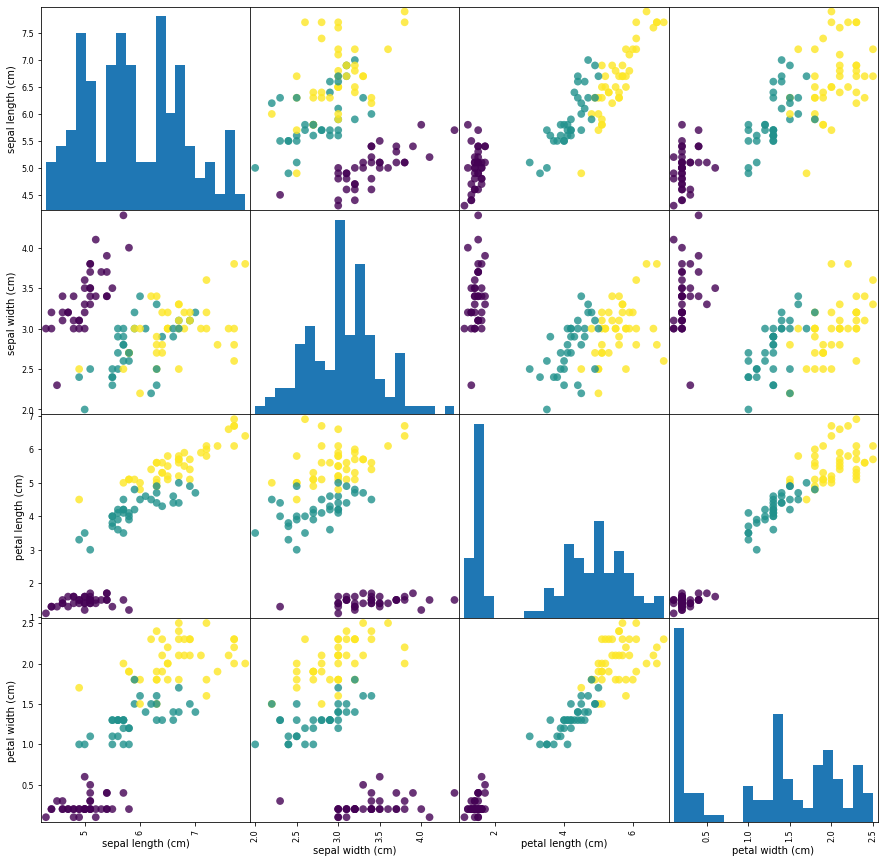

In [38]:
#### 矩阵散点图 scatter_matrix
# 多个特征排列组合的展示 scatter 散点图

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
 
iris=load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris['data'],iris['target'],random_state=0)
iris_df = pd.DataFrame(X_train,columns=iris.feature_names)
grr = pd.plotting.scatter_matrix(iris_df,c=y_train,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8)
plt.show()